In [1]:
N = (34 + 4 ) % 5 + 1

In [2]:
print(N)

4


1, 3,  6,  7,  8,  12, 13, 14, 15, 16, 17, 19, 
20, 22, 24, 25, 26, 27 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'NationalNames.csv'
data = pd.read_csv(file_path)

# 1

In [4]:
data.head(8)


,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


# 3

In [5]:
data.columns


Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

# 6

In [6]:
unique_female_names = data[data['Gender'] == 'F']['Name'].nunique()
unique_male_names = data[data['Gender'] == 'M']['Name'].nunique()

unique_names_table = pd.DataFrame({
    "Gender": ["F", "M"],
    "Name": [unique_female_names, unique_male_names]
})

unique_names_table


,Gender,Name
0,F,64911
1,M,39199


# 7

In [7]:
top_male_names_2010 = data[(data['Year'] == 2010) & (data['Gender'] == 'M')].nlargest(5, 'Count')

top_male_names_2010[['Id', 'Name', 'Year', 'Gender', 'Count']]


,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


# 8

In [8]:
import pandas as pd

most_popular_name = data.loc[data['Count'].idxmax()]

result_string = f"The name is '{most_popular_name['Name']}' in {most_popular_name['Year']}"

print(result_string)

The name is 'Linda' in 1947


# 12

In [9]:
year_with_most_unique_names = data.groupby('Year')['Name'].nunique().idxmax()

most_popular_in_peak_year = data[data['Year'] == year_with_most_unique_names].nlargest(1, 'Count')['Name'].values[0]

print(f"'{most_popular_in_peak_year}'")

'Jacob'


# 13

In [10]:
jacob_female = data[(data['Name'] == 'Jacob') & (data['Gender'] == 'F')]
most_popular_year_jacob_female = jacob_female[jacob_female['Count'] == jacob_female['Count'].max()]

most_popular_year_jacob_female[['Id', 'Name', 'Year', 'Gender', 'Count']]


,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


# 14

In [11]:
neutral_names = (
    data.groupby(['Year', 'Name'])['Gender']
    .nunique()
    .reset_index()
)

neutral_years = neutral_names[neutral_names['Gender'] == 2].groupby('Year')['Name'].count()

year_with_most_neutral_names = neutral_years.idxmax()
count_neutral_names = neutral_years.max()

neutral_names_table = pd.DataFrame({
    "Year": [year_with_most_neutral_names],
    "Gender_neutral_names": [count_neutral_names]
})

neutral_names_table


,Year,Gender_neutral_names
0,2008,2557


# 15

In [12]:
total_births_per_year = data.groupby('Year')['Count'].sum().reset_index()

total_births_per_year.head()


,Year,Count
0,1880,201484
1,1881,192699
2,1882,221538
3,1883,216950
4,1884,243467


# 16

In [13]:
births_per_year = data.groupby('Year')['Count'].sum()
max_birth_year = births_per_year.idxmax()

max_birth_year


1957

# 17

In [14]:
gender_counts_per_year = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()

gender_counts_per_year.head()


Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


# 19

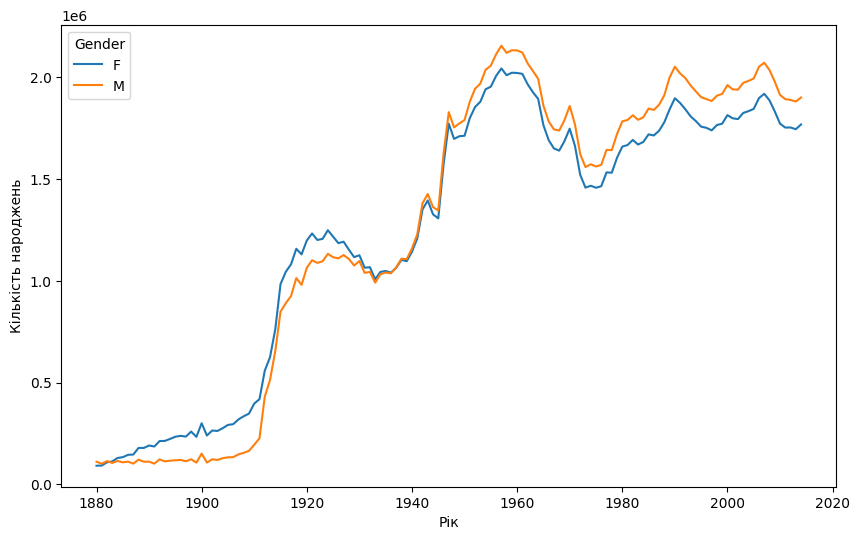

In [15]:
births_by_gender = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()

births_by_gender.plot(kind='line', figsize=(10, 6))
plt.xlabel('Рік')
plt.ylabel('Кількість народжень')
plt.show()


# 20

In [16]:
neutral_names = data.groupby('Name').filter(lambda x: len(x['Gender'].unique()) > 1)
neutral_count = neutral_names['Name'].nunique()

neutral_count


10221

# 22

In [17]:
import pandas as pd

unique_years = data['Year'].nunique()
result_string = f"'Спостереження проводилось {unique_years} років'"

print(result_string)

'Спостереження проводилось 135 років'


# 24

In [18]:
min_count = data['Count'].min()
unpopular_names = data[data['Count'] == min_count]

most_popular_of_unpopular = unpopular_names[unpopular_names['Count'] == unpopular_names['Count'].max()]

name = most_popular_of_unpopular['Name'].values[0]
count = most_popular_of_unpopular['Count'].values[0]

print(f"Найбільш популярне із не популярних ім'я - {name}. Їм називали {count} разів.")


Найбільш популярне із не популярних ім'я - Adelle. Їм називали 5 разів.


# 25

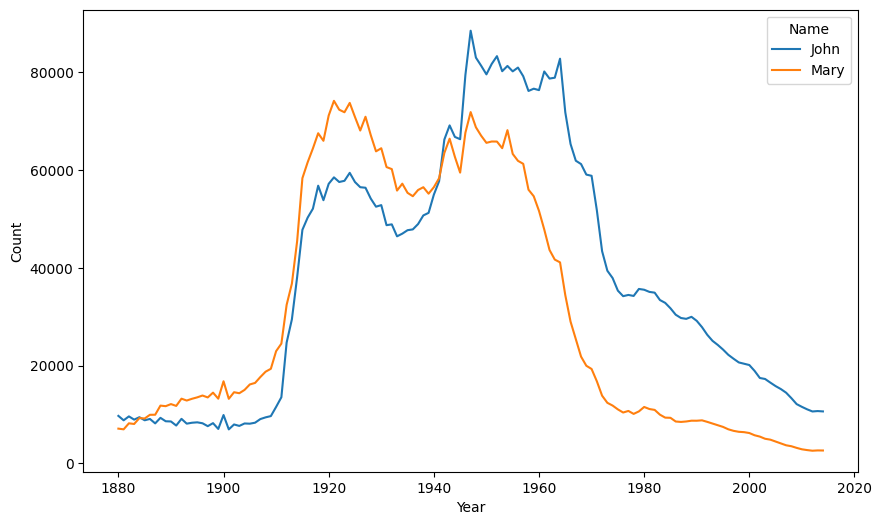

In [19]:
import matplotlib.pyplot as plt

names_to_plot = data[data['Name'].isin(['John', 'Mary'])]
names_per_year = names_to_plot.groupby(['Year', 'Name'])['Count'].sum().unstack()

names_per_year.plot(figsize=(10, 6))
plt.ylabel("Count")
plt.xlabel("Year")
plt.show()


# 26

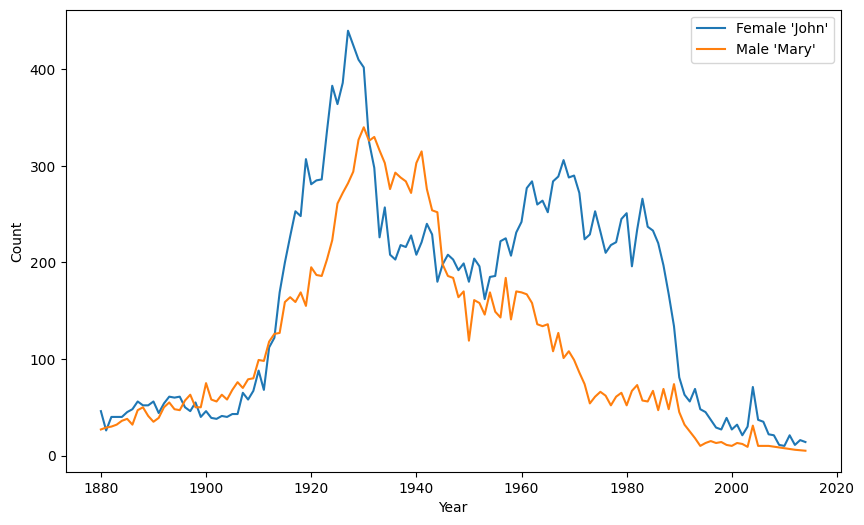

In [20]:
john_female = data[(data['Name'] == 'John') & (data['Gender'] == 'F')]
mary_male = data[(data['Name'] == 'Mary') & (data['Gender'] == 'M')]

plt.figure(figsize=(10, 6))
plt.plot(john_female['Year'], john_female['Count'], label="Female 'John'")
plt.plot(mary_male['Year'], mary_male['Count'], label="Male 'Mary'")
plt.ylabel("Count")
plt.xlabel("Year")
plt.legend()
plt.show()


# 27

In [21]:
most_popular_names_per_year = data.loc[data.groupby('Year')['Count'].idxmax()]
most_popular_names_per_year[['Year', 'Name', 'Count']]


,Year,Name,Count
942,1880,John,9655
2938,1881,John,8769
4963,1882,John,9557
7116,1883,John,8894
9318,1884,John,9388
...,...,...,...
1657592,2010,Isabella,22883
1691633,2011,Sophia,21816
1725502,2012,Sophia,22267
1759186,2013,Sophia,21147
